# Tarea localidad


In [2]:
import geopandas as gdp

In [6]:
gdf_barrios = gdp.read_file('barrio.geojson')
gdf_barrios

,fid,SCACODIGO,SCATIPO,SCANOMBRE,SHAPE_Leng,SHAPE_Area,LocNombre,geometry
0,6,004555,0,PATIO BONITO II,0.021316,0.000020,KENNEDY,"POLYGON ((-74.16392 4.63780, -74.16375 4.63757..."
1,7,004581,0,TIMIZA C,0.019610,0.000017,KENNEDY,"POLYGON ((-74.15694 4.61420, -74.15728 4.61388..."
2,10,004609,0,LOS ALMENDROS,0.016461,0.000014,KENNEDY,"POLYGON ((-74.17549 4.64375, -74.17549 4.64375..."
3,17,004618,0,DINTALITO,0.021894,0.000020,KENNEDY,"POLYGON ((-74.16875 4.62958, -74.16875 4.62958..."
4,34,004601,0,CALANDAIMA,0.021104,0.000026,KENNEDY,"POLYGON ((-74.16447 4.64336, -74.16426 4.64309..."
...,...,...,...,...,...,...,...,...
102,1155,004576,0,CASA BLANCA SUR,0.023590,0.000022,KENNEDY,"POLYGON ((-74.16754 4.62115, -74.16752 4.62110..."
103,1176,004541,0,EL PARAISO BOSA,0.017645,0.000007,KENNEDY,"POLYGON ((-74.17042 4.64452, -74.17008 4.64406..."
104,1181,105342,1,SABANA GRANDE RURAL,0.016197,0.000003,KENNEDY,"POLYGON ((-74.15000 4.66368, -74.15020 4.66377..."
105,1182,105211,1,OSORIO XII RURAL,0.012021,0.000005,KENNEDY,"POLYGON ((-74.18161 4.64753, -74.18201 4.64718..."


In [5]:
gdf_barrios.crs

<Geographic 2D CRS: EPSG:4686>
Name: MAGNA-SIRGAS
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank.
- bounds: (-84.77, -4.23, -66.87, 15.51)
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
gdf_barrios.to_crs(epsg=9377, inplace=True)

In [8]:
gdf_barrios

,fid,SCACODIGO,SCATIPO,SCANOMBRE,SHAPE_Leng,SHAPE_Area,LocNombre,geometry
0,6,004555,0,PATIO BONITO II,0.021316,0.000020,KENNEDY,"POLYGON ((4870949.138 2070577.688, 4870968.240..."
1,7,004581,0,TIMIZA C,0.019610,0.000017,KENNEDY,"POLYGON ((4871718.813 2067968.598, 4871680.388..."
2,10,004609,0,LOS ALMENDROS,0.016461,0.000014,KENNEDY,"POLYGON ((4869667.196 2071237.132, 4869667.031..."
3,17,004618,0,DINTALITO,0.021894,0.000020,KENNEDY,"POLYGON ((4870411.896 2069670.462, 4870411.576..."
4,34,004601,0,CALANDAIMA,0.021104,0.000026,KENNEDY,"POLYGON ((4870888.475 2071191.961, 4870912.339..."
...,...,...,...,...,...,...,...,...
102,1155,004576,0,CASA BLANCA SUR,0.023590,0.000022,KENNEDY,"POLYGON ((4870544.509 2068738.028, 4870546.664..."
103,1176,004541,0,EL PARAISO BOSA,0.017645,0.000007,KENNEDY,"POLYGON ((4870229.611 2071321.247, 4870266.985..."
104,1181,105342,1,SABANA GRANDE RURAL,0.016197,0.000003,KENNEDY,"POLYGON ((4872497.217 2073434.977, 4872475.434..."
105,1182,105211,1,OSORIO XII RURAL,0.012021,0.000005,KENNEDY,"POLYGON ((4868989.028 2071656.154, 4868944.521..."


In [9]:
gdf_barrios["area"]=gdf_barrios.area/1000000

In [11]:
gdf_barrios["centroide"]=gdf_barrios.centroid

In [12]:
puntos = [(4.62055556, -74.06586111)]

In [13]:
from shapely.geometry import Point

In [14]:
latitud = 4.62055556
longitud = -74.06586111

In [15]:
punto = gdp.GeoDataFrame(geometry=[Point(longitud,latitud)], crs = 'EPSG:4326')

In [16]:
punto.to_crs(epsg=9377, inplace = True)

In [18]:
gdf_barrios["distancia"]= gdf_barrios.centroid.distance(punto.geometry.iloc[0])

In [20]:
gdf_barrios

,fid,SCACODIGO,SCATIPO,SCANOMBRE,SHAPE_Leng,SHAPE_Area,LocNombre,geometry,area,centroide,distancia
0,6,004555,0,PATIO BONITO II,0.021316,0.000020,KENNEDY,"POLYGON ((4870949.138 2070577.688, 4870968.240...",0.240196,POINT (4870811.951 2070413.915),11147.450653
1,7,004581,0,TIMIZA C,0.019610,0.000017,KENNEDY,"POLYGON ((4871718.813 2067968.598, 4871680.388...",0.207578,POINT (4871474.748 2068018.027),10364.613871
2,10,004609,0,LOS ALMENDROS,0.016461,0.000014,KENNEDY,"POLYGON ((4869667.196 2071237.132, 4869667.031...",0.175509,POINT (4869643.276 2071560.567),12518.346574
3,17,004618,0,DINTALITO,0.021894,0.000020,KENNEDY,"POLYGON ((4870411.896 2069670.462, 4870411.576...",0.245514,POINT (4870337.184 2070070.253),11569.465742
4,34,004601,0,CALANDAIMA,0.021104,0.000026,KENNEDY,"POLYGON ((4870888.475 2071191.961, 4870912.339...",0.316524,POINT (4870586.836 2071211.874),11520.248546
...,...,...,...,...,...,...,...,...,...,...,...
102,1155,004576,0,CASA BLANCA SUR,0.023590,0.000022,KENNEDY,"POLYGON ((4870544.509 2068738.028, 4870546.664...",0.272624,POINT (4870084.065 2068413.808),11738.181224
103,1176,004541,0,EL PARAISO BOSA,0.017645,0.000007,KENNEDY,"POLYGON ((4870229.611 2071321.247, 4870266.985...",0.090770,POINT (4870443.220 2070942.661),11604.268072
104,1181,105342,1,SABANA GRANDE RURAL,0.016197,0.000003,KENNEDY,"POLYGON ((4872497.217 2073434.977, 4872475.434...",0.033182,POINT (4872164.513 2073492.977),10799.516082
105,1182,105211,1,OSORIO XII RURAL,0.012021,0.000005,KENNEDY,"POLYGON ((4868989.028 2071656.154, 4868944.521...",0.059112,POINT (4868840.068 2071649.404),13320.615670


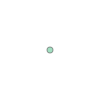

In [22]:
Kennedy = Point(-74.06586111, 4.62055556)
Kennedy

In [23]:
Kennedy = gdp.GeoSeries(Kennedy, crs = 4326)
Kennedy

0    POINT (-74.06586 4.62056)
dtype: geometry

In [25]:
Kennedy = Kennedy.to_crs(epsg=9377)
Kennedy

0    POINT (4881819.767 2068655.042)
dtype: geometry

In [26]:
gdf_barrios["distancia_u"]= [Kennedy.distance(centroid)/1000 for centroid in gdf_barrios.centroid]

<Axes: >

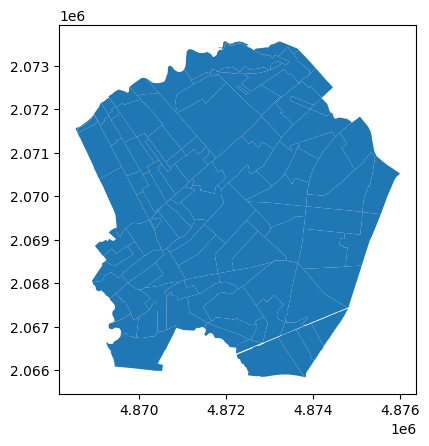

In [27]:
gdf_barrios.plot()

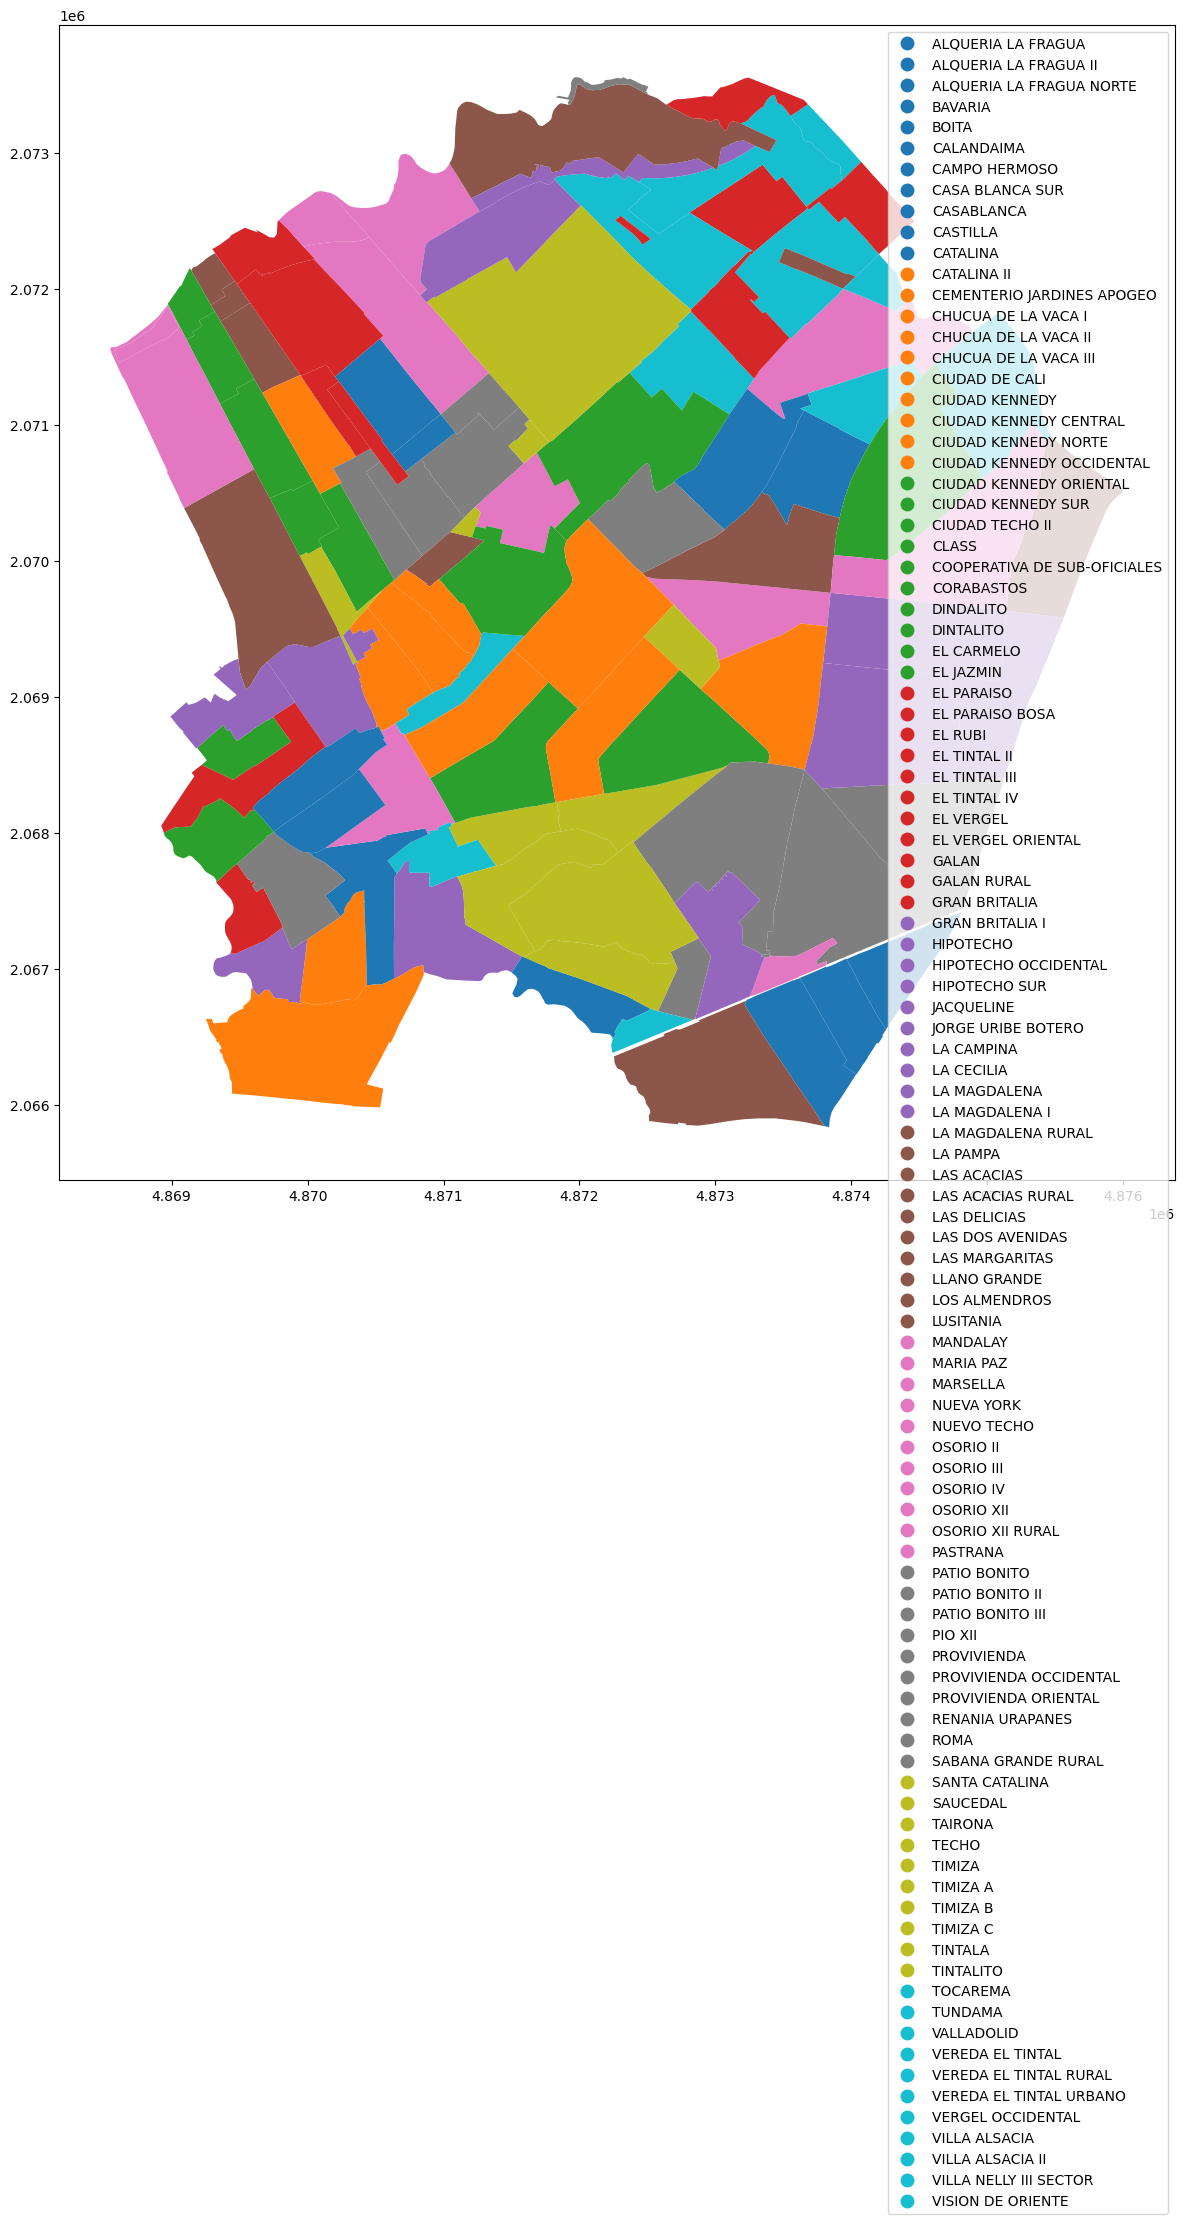

In [31]:
mapa_2= gdf_barrios.plot(
    column = "SCANOMBRE",
    figsize = (15,15),
    cmap = 'tab10',
    legend = True,

)